In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import re

In [2]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
import streamlit as st
import nltk
nltk.download('punkt')  # <- Add this line here
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



[nltk_data] Downloading package punkt to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:

from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('sms_spam.csv')

In [4]:
df.sample(2)

,type,text
3498,ham,"Oh, the grand is having a bit of a party but i..."
1926,ham,We don call like &lt;#&gt; times oh. No give...


## Data cleaing is our first step

df.info()

In [5]:
df = df.drop_duplicates()
df.isnull().sum()
df.shape

(5160, 2)

## hence there is no duplicates,no missing values,our data is ready for next step.

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['type'] = encoder.fit_transform(df['type'])

In [8]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Next step is Exploratory Data Analysis (EDA)

In [9]:
## first of we check how many percentage of our messages are spam or ham

In [10]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['type'].value_counts()

type
0    4518
1     642
Name: count, dtype: int64

In [12]:
## above '0' denotes ham messages and '1' denotes spam messages
## we also represents using pie charts


([<matplotlib.patches.Wedge at 0x28077711400>,
 [Text(-1.017034638542128, 0.41909491049818676, 'ham'),
  Text(1.0170347751005293, -0.41909457910621567, 'spam')],
 [Text(-0.5547461664775243, 0.22859722390810183, '87.56'),
  Text(0.554746240963925, -0.22859704314884488, '12.44')])

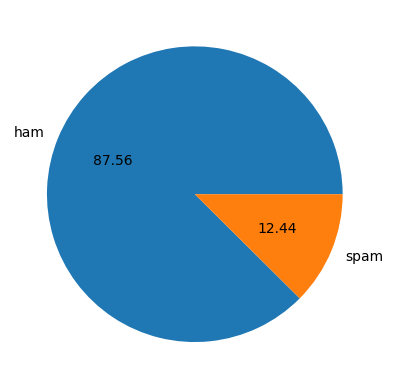

In [13]:
plt.pie(df['type'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters']=df['text'].apply(len)

In [17]:
df.head()

,type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
print(df.columns)


Index(['type', 'text', 'num_characters'], dtype='object')


In [19]:
df['num_characters'] = df['text'].apply(lambda x: len(str(x))) 

In [20]:
df['num_words'] = df['text'].apply(lambda x: len(str(x).split())) 

In [21]:
print('type' in df.columns) 


True


In [22]:
print(df['type'].unique())  


[0 1]


In [23]:
print(df.isnull().sum())


type              0
text              0
num_characters    0
num_words         0
dtype: int64


In [24]:
df = df.fillna('')


In [25]:
df[df['type'] == 0][['num_characters','num_words',]].describe()

## this is for ham messages

,num_characters,num_words
count,4518.000000,4518.000000
mean,70.860558,14.233068
std,56.584422,11.161618
min,2.000000,1.000000
25%,34.000000,7.000000
50%,53.000000,11.000000
75%,91.000000,19.000000
max,910.000000,171.000000


In [26]:
df[df['type'] == 1][['num_characters','num_words',]].describe()
##this is for spam messages

,num_characters,num_words
count,642.000000,642.000000
mean,137.414330,23.699377
std,29.975596,5.968584
min,13.000000,2.000000
25%,131.000000,21.250000
50%,148.000000,25.000000
75%,157.000000,28.000000
max,223.000000,35.000000


In [27]:
## now we will plot both spam and ham messages using histogram

<Axes: xlabel='num_words', ylabel='Count'>

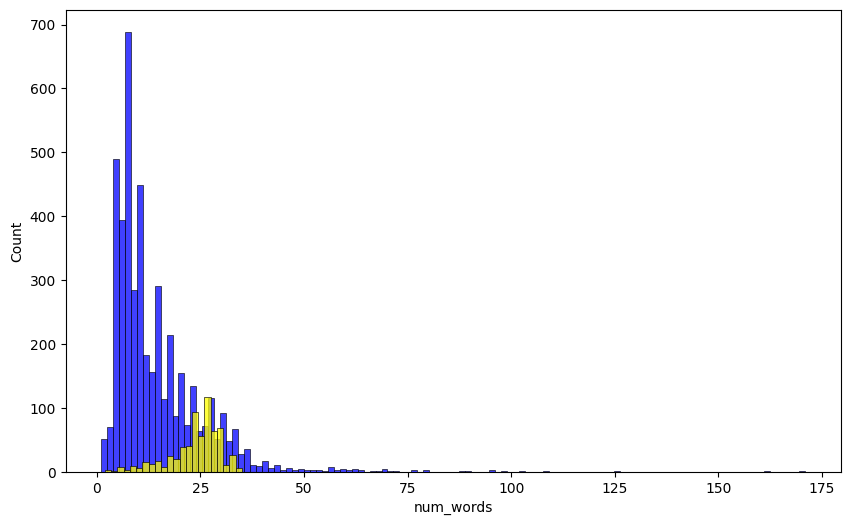

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['type']==0]['num_words'],color='blue')
sns.histplot(df[df['type']==1]['num_words'],color='yellow')

<Axes: xlabel='num_characters', ylabel='Count'>

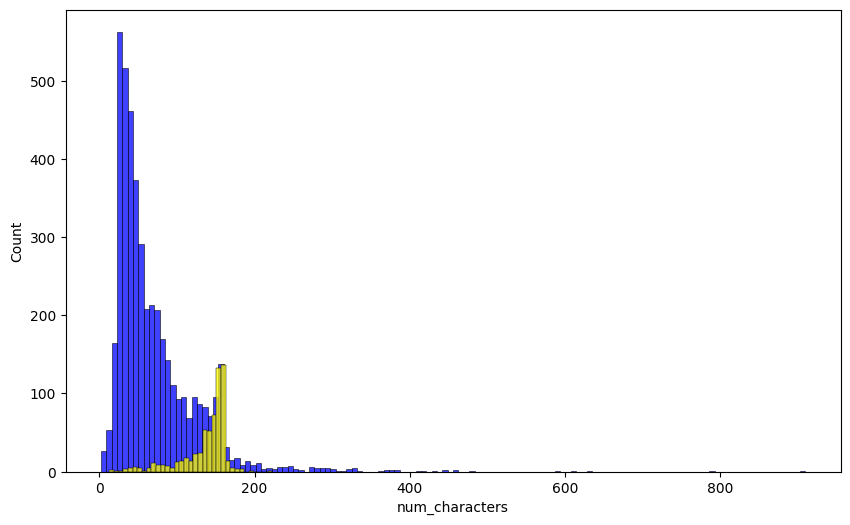

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['type']==0]['num_characters'],color='blue')
sns.histplot(df[df['type']==1]['num_characters'],color='yellow')

In [30]:
## now we observe that relation between number of words to number of characters

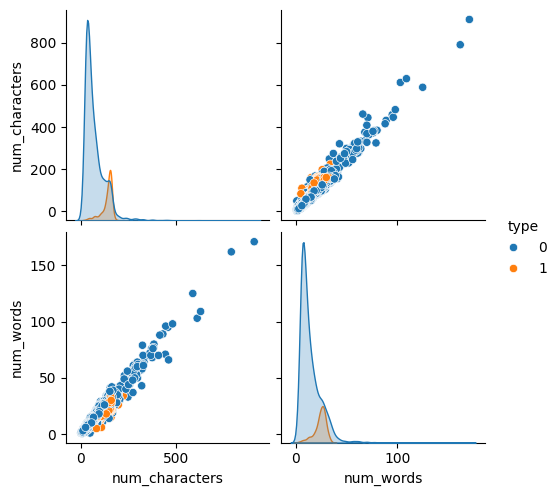

In [31]:
sns.pairplot(df,hue='type')

In [32]:
numeric_df = df.select_dtypes(include=['number'])

In [33]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: >

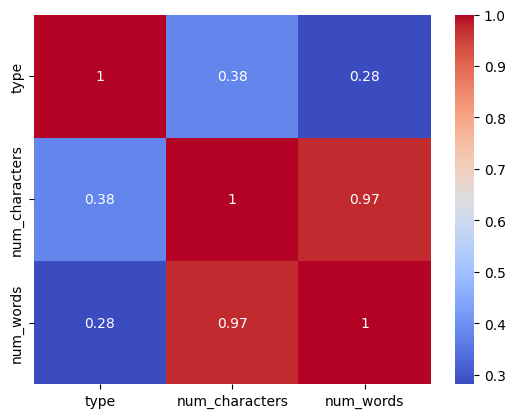

In [34]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
#The sns.heatmap(df.corr()) function is used to visualize the correlation between numerical columns in a DataFrame.

In [35]:
##now we perform Data Preprocessing.Here are the basics steps for that
#lower case,tokenization,removing stop words and punctuation and stemming

In [36]:
import nltk
from nltk.tokenize import word_tokenize

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

 ##Data Preprocessing
Lower case ,
Tokenization ,
Removing special characters ,
Removing stop words and punctuation ,
Stemming,

In [38]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package punkt to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Banoth
[nltk_data]     samba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [ ]:

df['text'][10]

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [ ]:
df.head()

In [ ]:
spam_corpus = []
for msg in df[df['type'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [ ]:

len(spam_corpus)

In [ ]:
from collections import Counter

# Get the 30 most common words in the spam_corpus
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot using seaborn with keyword arguments
sns.barplot(x='Word', y='Frequency', data=word_freq)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter

# Create DataFrame from 30 most common words in ham_corpus
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot using seaborn with keyword arguments
sns.barplot(x='Word', y='Frequency', data=word_freq)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()


In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

##NEXT STEP IS BUILDING A MODEL


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

In [ ]:
y = df['type'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)


In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
# Load your dataset and preprocess (assuming you've already done this)
# Example:
# df['transformed'] = df['message'].apply(transform_text)
# X = tfidf.fit_transform(df['transformed'])
# y = df['label_num']

from sklearn.naive_bayes import MultinomialNB
import pickle

model = MultinomialNB()
model.fit(X, y)  # Make sure X is from your tfidf

pickle.dump(model, open('model.pkl', 'wb'))


In [11]:
import nltk
from nltk.data import find

print(find('tokenizers/punkt'))


C:\Users\Banoth samba\AppData\Roaming\nltk_data\tokenizers\punkt
